# Automodeals

### Basic Information

Title: KSL AutomoDeals
<br>
Names: Chantel Charlebois, Taylor Hansen, Michael Paskett
<br>
E-mails: chantel.charlebois@utah.edu, taylor.c.hansen@utah.edu, michael.paskett@utah.edu
<br>
UIDS: u1043299, u0642850, u1144000

### Background and Motivation

Almost every person in Utah (and some neighboring states) buying a used car will visit KSL Cars classifieds to look for their new wheels. There are a few resources for understanding the rough value of a used car, such as Kelly Blue Book (https://www.kbb.com) and CarGurus (https://www.cargurus.com/), but such services may not fully incorporate the complex auto market of a local area. By storing and analyzing the prices, details, and options for a certain model or class of vehicle, a prospective buyer can evaluate how good the listed price for a vehicle actually is. With such a model, the user can estimate how much a specific car is really worth, and determine if the vehicle is worthy of a test drive.

### Project Objectives

Questions:
* How well can we predict the price of a newly-listed car based on the attributes available in an a ksl advertisement?
* Which attributes are most influential in determining the vehicle price?
* What nearby areas have the best price of cars?

Aims:
* Create a regression model that will predict the expected price of a car based on several attributes, such as:
    * year,  seller type (dealer/private), mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views rate
* Create a clustered map of “good deals” in different regions

Benefits:
* This project could benefit anyone in the market for a used car in the KSL area, helping them to be informed of the potential value of a car they are interested in.

### Ethical Considerations

Stakeholders:
* The creators (us)
* The seller
* The prospective buyer
* KSL

Our incentive as creators and prospective buyers is to find good deals without having to manually spend hours searching through KSL for a good deal. For other prospective buyers, the same applies. The sellers have competing interests, as they would like to sell their car for as much as possible. KSL also has a stake in this project, as it makes revenue from ads and from sellers paying for better listings in order to make their vehicle more prominent.

### Data

We scraped our data from queries of used cars listed on [cars.ksl.com](https://cars.ksl.com/). We read the robots.txt files for both ksl.com and cars.ksl.com to confirm that there were no restrictions for crawling their website. We also reviewed the terms and conditions and similarly found no indication for rules on crawling. There used to be an undocumented API for interfacing with KSL (as of four years ago), but it is no longer publicly accessible, so we manually scraped the data with BeautifulSoup.

To avoid consistently using too much bandwidth on their website, our initial plan was to start with “historical” data collection by saving .html pages over the course of the project so that we could parse them offline. However, we found that KSL listings are dynamically loaded by JavaScript, and the html files were bloated with other associated files which would be too unwieldy to download on a daily basis (on the order of 5,000 cars/day). Instead, we opted for a live crawler approach to get our data.

After an initial crawl through the website to get as many used cars listings as possible, we automated the crawler to go in every night at a randomly scheduled time and pull any newly listed cars not already in our repository. The code associated with this crawler was developed initially in various Jupyter notebooks before porting over to .py files for automation. The code is not included in the present notebook given its length. The crawler/scraping functions are described in more detail in the Project Milestone.

We also used CarGurus website https://www.cargurus.com/Cars/sell-car/?pid=SellMyCarDesktopHeader and their API to request an expected car price based on each car's Make, Model, Mileage, Year, and Zip Code. 

#### KSL


##### A typical search page from KSL Cars:
Links for each newly listed individual car were scraped from pages like this.
<br>
<img src='screenshots\KSL_search_page.png'>

<br>
<br>

***

<br>

##### A typical individual listing from KSL cars:
A pandas dataframe was filled with car info scraped from pages like this.
<br>
<img src='screenshots\KSL_listing.png'>

<br>
<br>

***

<br>

##### Crawler Automation:
The crawler was scheduled to run every night and scrape data for any newly listed cars.
<br>
<img src='screenshots\automating_repo_update.png'>

<br>
<br>

***

<br>
<br>

#### Expected Price from CarGurus and Zip Codes
Example of the form used to request the expected car price from CarGurus using their API.
<img src="screenshots\cargurus.png">

All code to get the expected price is commented out because it takes too long to run. Code also found in the GetExpectedPrice.ipynb notebook.

In [1]:
# import requests
# import pandas as pd
# import os
# import numpy as np
# import bs4
# import time

In [2]:
# # Read in scraped car data
# data_file = os.path.join(os.getcwd(),"data","all_cars.csv") 
# cars = pd.read_csv(data_file)
# pd.set_option("display.max_columns",None) 
# cars['mileage'] = cars['mileage'].astype('Int64')
# cars['year'] = cars['year'].astype('Int64')
# cars.info()

In [3]:
# # Create dictionary of zip codes for all towns to look up expected price
# # Website to look up zipcodes
# # http://localistica.com/usa/ut/salt%20lake%20city/zipcodes/all-zipcodes/

# def get_most_populated_zip_code(city):
#     try:
#         r = requests.get(f'http://localistica.com/search.aspx?q={city.lower().replace(" ", "+")}')
#         url = bs4.BeautifulSoup(r.text).find("a", id="ctl09_hlZipCodesCount")['href']
#         return int(bs4.BeautifulSoup(requests.get(url).text).find(id="dgZipCodes").find_all("tr")[1].td.a.text)
#     except:
#         return None
    

# # get unique cities in dataframe
# all_cities = [car for car in cars.city.unique() if type(car) == str]
# keyList = [x + ", " + cars[cars.city == x].iloc[0]['state'] for x in all_cities]
# # look up zipcode
# zip_codes = {key: get_most_populated_zip_code(key + " " + cars[cars.city == key].iloc[0]['state']) for key in all_cities}
# # hard code the ones it missed
# zip_codes.update({'St. Anthony': 83445, 'Provo Canyon': 84604})
# # check for missing zip codes
# print(len([k for k,v in zip_codes.items() if v == None]))
# zip_codes

In [4]:
# # list of all cars in CarGurus database
# all_cars = requests.get("https://www.cargurus.com/Cars/getCarPickerReferenceDataAJAX.action?showInactive=false&useInventoryService=false&quotableCarsOnly=false&localCountryCarsOnly=true&outputFormat=REACT").json()

# # gets CarGuru make and model id to find price for individual make and model
# def get_cargurus_maker_and_model_ids(all_cars, car_make, car_model):
#     try:
#         all_models = [x for x in all_cars.get('allMakerModels').get('makers') if x.get('name') == car_make][0]
#         return (all_models.get('id'), [x for x in all_models.get('models') if x.get('name') == car_model][0].get('id'))
#     except (IndexError, AttributeError):
#         return (None, None)
    
# # gets the entity id which includes the make, model, and year of car
# def get_entity_id(maker_id, model_id, car_year):
#     try:
#         all_entities = requests.get(f"https://www.cargurus.com/Cars/getSelectedMakerModelCarsAJAX.action?showInactive=false&useInventoryService=false&quotableCarsOnly=false&localCountryCarsOnly=true&outputFormat=REACT&maker={maker_id}").json()
#         model_entity_ids = [car for car in all_entities.get('models') if car.get('id') == model_id][0]
#         return [ids for ids in model_entity_ids.get('cars') if ids.get('year') == car_year][0].get('id')
#     except (IndexError, AttributeError):
#         return None
    
# # gets the estimated listing price of the car based on entity id and the mileage
# def get_price(car_make, car_model, car_year, car_mileage, car_zip_code, all_cars):
#     maker_id, model_id = get_cargurus_maker_and_model_ids(all_cars, car_make, car_model)
#     if not model_id or pd.isna(car_mileage):
#         return None
    
#     entity_id = get_entity_id(maker_id, model_id, car_year)
    
#     if not entity_id:
#         return None 
#     # data needed to request CarGurus report
#     data = {
#         'carDescription.radius': 75,
#         'selectedEntity': entity_id,
#         'carDescription.transmission': "",
#         'carDescription.mileage': car_mileage,
#         'carDescription.postalCode': car_zip_code,
#         'carDescription.engineId': "",
#         'carDescription.vin': "",
#         'carDescription.vinType': "",
#         'forPrivateListing': True,
#         'inventoryListingId' : ""
#     }
    
#     res = requests.post("https://www.cargurus.com/Cars/generateReportJsonAjax.action", data=data)
#     res.raise_for_status()
#     try:
#         return res.json().get("priceDetails").get("privateListingPrice") #private listing price from CarGurus report
#     except AttributeError:
#         raise Exception(res.json())


# for index, row in cars.iterrows():
#     if row["city"] in zip_codes.keys():
#         try:
#             expected_price = get_price(row["make"], row["model"], row["year"], row["mileage"], zip_codes.get(row["city"]), all_cars)
#         except Exception as e:
#             print(e)
#             time.sleep(5)
#             continue
#         # change expected prices that are 0 to none
#         if expected_price == None or expected_price < 1:
#             expected_price = None 
#             print(index)
#         cars.loc[index, "expected_price"] = expected_price
#     else:
#         cars.loc[index, "expected_price"] = None

# # Add zip codes to a column
# for index, row in cars.iterrows():
#     cars.loc[index, "zip_code"] = zip_codes.get(row["city"])
    
# # save cars dataframe to pickle
# cars.to_pickle("./cars.pkl")

# pickle_cars.info() # 36,325 expected prices

### Data Processing

Each KSL listing page has a fairly consistent format making scraping feasible for the large number of pages we analyzed. When creating a listing, the user is required to list the year, VIN, make, model, body style, mileage, title type, asking price, and location. Together, these are the only features we can guarantee to extract from each page. Of course, many listings have many more details listed than these which we also incorporated into our analysis (as shown in the example listing above).

As mentioned above, data was scraped with BeautifulSoup and structured into a pandas dataframe. Numerical variables for categorical variables were generated and concatenated to this dataframe to facilitate use of these variables. Subsequent processing was done using built-in pandas masking to get relevant rows from the dataframe for new queries when searching recently listed used cars.

### Exploratory Analysis

We visualized our data in multiple ways to check our data scraping procedures and make sure we did not incorrectly classify our data. The first basic check we did was scroll through the data frame for any obvious errors using the display command. We then used the describe command to look at the descriptive statistics of each column in our dataframe. Next we visualized the data using a scatterplot matrix in order to check the histograms of each parameter for outliers and general trends. We also used the scatterplot matrix to explore correlations between different parameters. We also visualized a heat map of the correlation matrix to determine which parameters were strongly correlated. This information was used to identify potential strong predictors for the multiple linear regression and determine if any parameters were potential confounders.

Basic outline:
1. Scroll through the dataframe for any obvious errors
2. Describe command to verify the descriptive statistics
3. Visualize using the scatterplot matrix to explore histograms of each parameter and look for outliers/trends
4. Heat map of the correlation matrix to determine which parameters are strongly correlated to identify potential strong predictors for the multiple linear regression or potential confounders

In [5]:
import pandas as pd
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as sm
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [6]:
# Read in scraped car data
data_file = os.path.join(os.getcwd(),"data","all_cars.csv")
cars = pd.read_csv(data_file)
# cars = pd.read_pickle('cars.pkl')
pd.set_option("display.max_rows",None,"display.max_columns",None) 

# Recast data
cars['mileage'] = cars['mileage'].astype('float')
cars['year'] = cars['year'].astype('float')

# Clean price data and recast
ugly_cars = cars[cars['price'].str.contains('MSRP')]
ugly_cars.index
for index, car in ugly_cars.iterrows():
    if '|' not in car['price']:
        cars.at[index,'price'] = None
    else:
        cars.at[index,'price'] = car['price'].split('|')[0].strip()
cars['price'] = cars['price'].astype('float')

#### Descriptive Statistics

In [7]:
display(cars.describe())
display(cars.info())

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view
count,5.389700e+04,5.388500e+04,53890.000000,5.375600e+04,3895.000000,53400.000000,41296.000000,53897.000000,36325.000000,53611.000000,47937.000000,47937.000000,53897.000000,4.793700e+04,4.793700e+04,4.793600e+04
mean,1.585342e+09,1.863960e+04,2012.532362,1.317392e+05,3.832914,5.670487,3.855507,20.103939,17138.161376,84139.351103,305.316228,7.681499,0.836169,5.009282e-09,1.274098e-10,inf
std,3.810373e+05,5.549875e+04,7.643743,9.342829e+06,15.987546,1.584938,0.575834,14.062686,10007.654668,954.334584,667.094249,14.333028,0.370126,1.272314e-08,2.790996e-10,NaN
min,1.584808e+09,1.000000e+00,1900.000000,1.000000e+00,0.000000,1.000000,-1.000000,0.000000,200.000000,21076.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.585022e+09,8.375000e+03,2010.000000,3.033300e+04,2.400000,4.000000,4.000000,9.000000,10194.000000,84025.000000,34.000000,1.000000,1.000000,4.590000e-10,7.800000e-12,4.752008e-03
50%,1.585277e+09,1.580000e+04,2015.000000,6.476400e+04,3.500000,6.000000,4.000000,20.000000,15177.000000,84081.000000,107.000000,3.000000,1.000000,1.540000e-09,3.940000e-11,2.272727e-02
75%,1.585632e+09,2.500000e+04,2017.000000,1.184592e+05,5.000000,6.000000,4.000000,29.000000,22053.000000,84101.000000,311.000000,9.000000,1.000000,4.680000e-09,1.310000e-10,3.819480e-02
max,1.586152e+09,1.234568e+07,2020.000000,2.147484e+09,996.000000,12.000000,5.000000,214.000000,260109.000000,97913.000000,31052.000000,495.000000,1.000000,8.950000e-07,9.130000e-09,inf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53897 entries, 0 to 53896
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   post_date       53897 non-null  object 
 1   lastpull_ts     53897 non-null  int64  
 2   link            53897 non-null  object 
 3   price           53885 non-null  float64
 4   year            53890 non-null  float64
 5   make            53894 non-null  object 
 6   model           53893 non-null  object 
 7   body            53782 non-null  object 
 8   mileage         53756 non-null  float64
 9   title_type      28793 non-null  object 
 10  city            53611 non-null  object 
 11  state           53611 non-null  object 
 12  seller          53897 non-null  object 
 13  trim            45047 non-null  object 
 14  ext_color       50306 non-null  object 
 15  int_color       45125 non-null  object 
 16  transmission    48804 non-null  object 
 17  liters          3895 non-null  

None

Cleaned Descriptive Statistics


,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view
count,5.389700e+04,53864.000000,53888.000000,53723.000000,3894.00000,53400.000000,41296.000000,53897.000000,36325.000000,53611.000000,47937.000000,47937.000000,53897.000000,4.793700e+04,4.793700e+04,47935.000000
mean,1.585342e+09,18371.249684,2012.536520,80052.217821,3.57812,5.670487,3.855507,20.103939,17138.161376,84139.351103,305.316228,7.681499,0.836169,5.009282e-09,1.274098e-10,0.027150
std,3.810373e+05,13871.962529,7.613351,62200.389323,1.65511,1.584938,0.575834,14.062686,10007.654668,954.334584,667.094249,14.333028,0.370126,1.272314e-08,2.790996e-10,0.031623
min,1.584808e+09,100.000000,1923.000000,1.000000,0.00000,1.000000,-1.000000,0.000000,200.000000,21076.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.585022e+09,8400.000000,2010.000000,30316.500000,2.40000,4.000000,4.000000,9.000000,10194.000000,84025.000000,34.000000,1.000000,1.000000,4.590000e-10,7.800000e-12,0.004750
50%,1.585277e+09,15800.000000,2015.000000,64691.000000,3.50000,6.000000,4.000000,20.000000,15177.000000,84081.000000,107.000000,3.000000,1.000000,1.540000e-09,3.940000e-11,0.022727
75%,1.585632e+09,25009.500000,2017.000000,118252.000000,5.00000,6.000000,4.000000,29.000000,22053.000000,84101.000000,311.000000,9.000000,1.000000,4.680000e-09,1.310000e-10,0.038194
max,1.586152e+09,399812.000000,2020.000000,481066.000000,16.30000,12.000000,5.000000,214.000000,260109.000000,97913.000000,31052.000000,495.000000,1.000000,8.950000e-07,9.130000e-09,1.000000


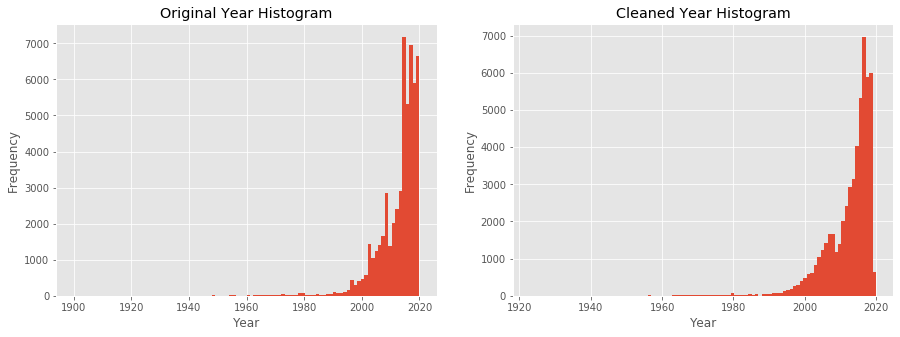

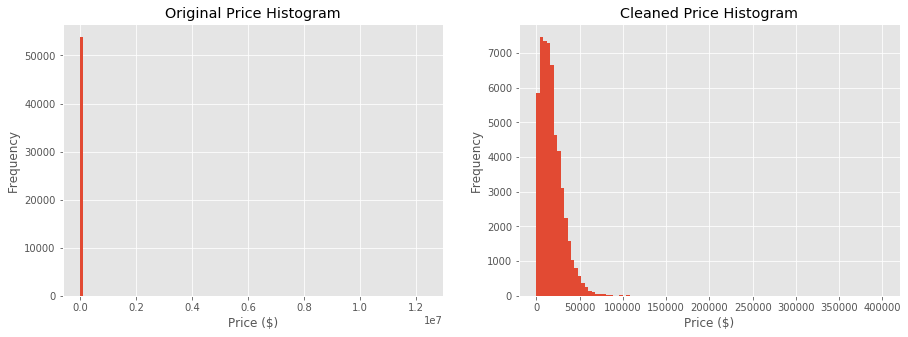

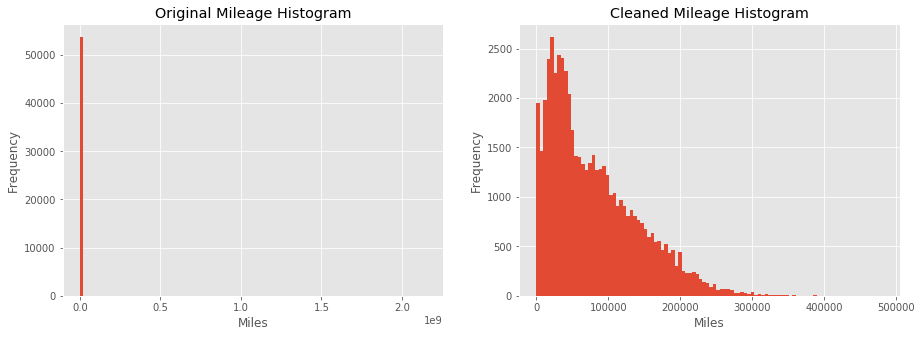

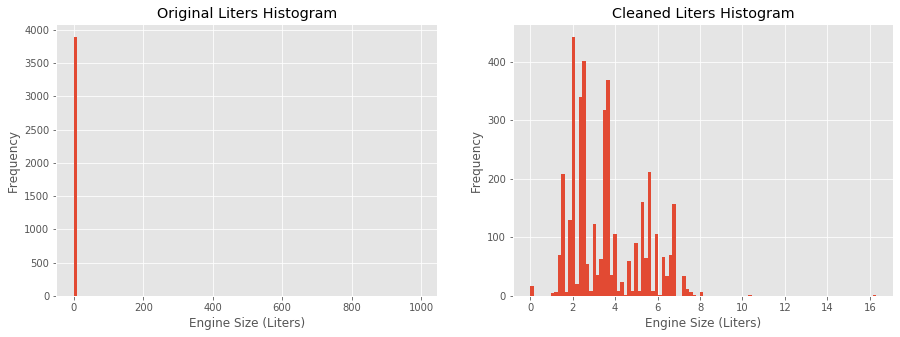

In [8]:
# Data clean up
# Check year
plt.figure(figsize=(15,5))
plt.subplot(121)
cars["year"].plot.hist(bins=100)
plt.title('Original Year Histogram')
plt.xlabel('Year')
# any cars with a year less than 1920 changed to None
cars.loc[(cars.year < 1920),'year']=None 
plt.subplot(122)
cars["year"].plot.hist(bins=100)
plt.title('Cleaned Year Histogram')
plt.xlabel('Year')

# Check price
plt.figure(figsize=(15,5))
plt.subplot(121)
cars["price"].plot.hist(bins=100)
plt.title('Original Price Histogram')
plt.xlabel('Price ($)')
# any cars with a price less than $100 or greater than $500,000 changed to None
cars.loc[(cars.price < 100),'price']=None 
# expcars = cars['price'] > 500000
# expcars = cars[expcars]
# display(expcars)
cars.loc[(cars.price > 500000),'price']=None 
plt.subplot(122)
cars["price"].plot.hist(bins=100)
plt.title('Cleaned Price Histogram')
plt.xlabel('Price ($)')

# Check Mileage
plt.figure(figsize=(15,5))
plt.subplot(121)
cars["mileage"].plot.hist(bins=100)
plt.title('Original Mileage Histogram')
plt.xlabel('Miles')
# any cars with a mileage greater than 500000 changed to None
cars.loc[(cars.mileage > 500000),'mileage']=None 
plt.subplot(122)
cars["mileage"].plot.hist(bins=100)
plt.title('Cleaned Mileage Histogram')
plt.xlabel('Miles')

# Check Liters
plt.figure(figsize=(15,5))
plt.subplot(121)
cars["liters"].plot.hist(bins=100)
plt.title('Original Liters Histogram')
plt.xlabel('Engine Size (Liters)')
# any cars with a liters greater than 100 changed to None
cars.loc[(cars.liters > 100),'liters']=None 
plt.subplot(122)
cars["liters"].plot.hist(bins=100)
plt.title('Cleaned Liters Histogram')
plt.xlabel('Engine Size (Liters)')

# Check fav_per_view
# any cars with inf or Nan changed to None
cars.loc[(cars.fav_per_view > 2),'fav_per_view']=None 

print('Cleaned Descriptive Statistics')
display(cars.describe())

In [9]:
# Explore Categorical Variables
print(cars['body'].value_counts(), '\n')
print(cars['title_type'].value_counts(), '\n')
print(cars['seller'].value_counts(), '\n')
#print(cars['ext_color'].value_counts(), '\n')
print(cars['transmission'].value_counts(), '\n')
print(cars['fuel_type'].value_counts(), '\n')
print(cars['ext_condition'].value_counts(), '\n')
print(cars['int_condition'].value_counts(), '\n')
print(cars['drive_type'].value_counts(), '\n')

# create numerical categorical variables
print('\n Title types')
# set clean titles to 1 and other titles to 0
cars["title_num"] = cars["title_type"].map({'Rebuilt/Reconstructed Title':0, 'Salvage Title':0, 'Dismantled Title':0, 'Clean Title':1})
print(cars['title_num'].value_counts(), '\n')

print('Seller types')
cars["seller_num"] = cars["seller"].map({'Dealer':0, 'Owner':1})
print(cars['seller_num'].value_counts(), '\n')

print('Transmission types')
cars["transmission_num"] = cars["transmission"].map({'Automatic':0, 'Automanual':0, 'Manual':1, 'CVT':0})
print(cars['transmission_num'].value_counts(), '\n')

print('Drive types: 1 = 4 Wheel Drive, 0 = 2 Wheel Drive')
cars["drive_num"] = cars["drive_type"].map({'4-Wheel Drive':1, '2-Wheel Drive':0, 'FWD':0, 'AWD':1})
print(cars['drive_num'].value_counts(), '\n')

Sport Utility        15837
Sedan                13928
Truck                13500
Hatchback             2171
Coupe                 1652
Minivan               1601
SUV                   1389
Wagon                 1182
Van                   1045
Convertible            920
Crossover              285
Compact Car            115
Compact                 79
Industrial / Semi       78
Name: body, dtype: int64 

Clean Title                    25808
Rebuilt/Reconstructed Title     2623
Salvage Title                    354
Dismantled Title                   8
Name: title_type, dtype: int64 

Dealer    43811
Owner     10086
Name: seller, dtype: int64 

Automatic     44128
Manual         3225
Automanual     1259
CVT             192
Name: transmission, dtype: int64 

Gasoline                  43491
Diesel                     4567
Flex Fuel                  4376
Hybrid                      895
Electric                    269
Compressed Natural Gas       49
Bi-Fuel                       8
Ethanol       

#### Data Cleaning Interpretation
Looking at the histograms and descriptive statistics we had to clean the data and remove outliers. We changed the data to missing if the car year was older than 1920, the price was less than 100 dollars or greater than 500000 dollars, the mileage was greater than 500,000 miles, or the liters was greater than 100. This cleaned up most of the outliers and the describe() values look much more realistic. We then converted the categorical variables of title_type, seller, transmission, and drive_type to numerical categorical variables of 0 or 1 so that we could include them in our regression analysis.

#### Scatter Matrix & Correlation Matrix for All Cars

,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view,title_num,seller_num,transmission_num,drive_num
lastpull_ts,1.000000,-0.085628,-0.123134,0.121443,0.058759,0.030572,-0.048644,-0.120208,-0.061948,0.017801,-0.040169,-0.043572,0.132929,0.114518,0.129514,-0.003884,-0.068740,0.159276,0.042399,-0.019903
price,-0.085628,1.000000,0.466618,-0.558758,0.274217,0.292010,0.068695,0.254808,0.919681,-0.032742,-0.000413,-0.106348,0.093119,-0.031623,-0.116203,-0.117117,0.098279,-0.278693,-0.130645,0.419256
year,-0.123134,0.466618,1.000000,-0.598366,-0.291417,-0.204052,0.379125,0.275042,0.522635,-0.002392,-0.311069,-0.328288,0.087296,-0.296590,-0.315675,-0.028100,-0.066429,-0.498710,-0.290199,0.119282
mileage,0.121443,-0.558758,-0.598366,1.000000,0.298261,0.198264,-0.089314,-0.282535,-0.548937,-0.009238,0.105319,0.158329,-0.082806,0.109116,0.159191,0.053254,0.093570,0.405557,0.117437,-0.075280
liters,0.058759,0.274217,-0.291417,0.298261,1.000000,0.886438,-0.133256,-0.108032,0.320496,-0.042012,0.145345,0.179753,0.044414,0.117328,0.160066,-0.023884,0.141457,0.262367,-0.060711,0.431341
cylinders,0.030572,0.292010,-0.204052,0.198264,0.886438,1.000000,-0.100590,0.011815,0.361932,-0.014856,0.140958,0.112276,0.012053,0.118710,0.098562,-0.053841,0.118824,0.098860,-0.108005,0.453720
n_doors,-0.048644,0.068695,0.379125,-0.089314,-0.133256,-0.100590,1.000000,0.104543,-0.030630,-0.011673,-0.218506,-0.177330,0.032011,-0.198617,-0.168393,0.044031,-0.057474,-0.191130,-0.301936,0.053305
n_pics,-0.120208,0.254808,0.275042,-0.282535,-0.108032,0.011815,0.104543,1.000000,0.179563,0.015724,0.031728,0.029659,0.073668,0.005791,-0.000331,0.038751,0.053949,-0.335500,-0.101186,0.112671
expected_price,-0.061948,0.919681,0.522635,-0.548937,0.320496,0.361932,-0.030630,0.179563,1.000000,0.013342,0.091574,-0.044852,0.046839,0.045773,-0.056609,-0.114636,0.047186,-0.147950,-0.083692,0.394562
zip_code,0.017801,-0.032742,-0.002392,-0.009238,-0.042012,-0.014856,-0.011673,0.015724,0.013342,1.000000,0.012876,-0.001882,0.016269,0.015721,0.001538,-0.010051,-0.072520,-0.000516,0.013744,-0.067685


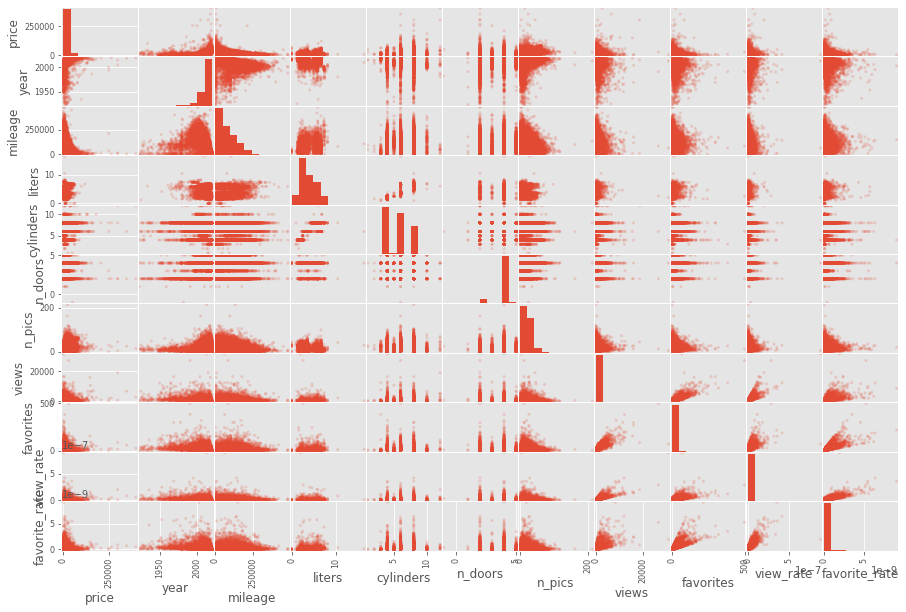

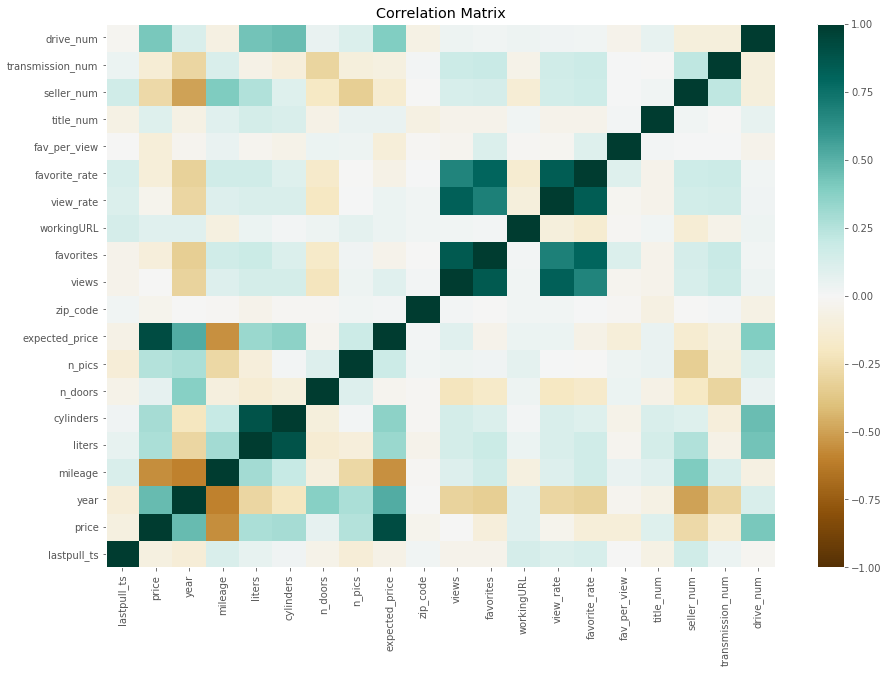

In [10]:
# Check histograms and scatter matrix for outliers
# Scatter Matrix
scatter_matrix(cars[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics",'views','favorites','view_rate','favorite_rate']], alpha = 0.2, figsize=(15, 10))
print()

# Correlation Matrix
# automatically ignores missing values
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot(111)
plt.pcolor(cars.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics','expected_price','zip_code','views','favorites','workingURL','view_rate','favorite_rate','fav_per_view','title_num', 'seller_num', 'transmission_num', 'drive_num'] 
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=90)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
display(cars.corr())

#### Data Exploration Interpretation for All Cars
The scatter matrix and correlation matrix for all the cars show that the strongest correlations with price are mileage ~ -0.56, year ~ 0.47, and drive_num ~ 0.42. All of these variables are what we would expect to correlate. Other variables that may be confounders because they correlate with each other are cylinders x liters, views x favorites, views x view_rate, views x favorite_rate, favorites x favorite_rate which also make sense that they would be correlated because they are so closely related.

### Analysis Methodology

#### Regression
Aim: predict the price of a newly-listed used car
<br>
Dependent variable:list price 
<br>
Possible independent variables: year, seller type (dealer/private), mileage, color, title (clean/salvaged), transmission type, cylinders, fuel type, number of doors, exterior/interior condition, listing date, page views per day. 
<br>
We will use the Python package statsmodels to perform all regression analyses. 
1. Multiple linear regression first using the parameters that had strong correlations with list price. 
2. Based off of this initial model we will adjust our multiple linear regression to only include parameters that have significant p-values for their individual coefficients. 
Significance level: 𝝰=0.05

Expected Outcomes:
* Our final model should have a p-value < 0.05 for the F-statistic of the overall model. 
* We are aiming to explain at least 70% of the variance with our model and hope to get an R-squared value of 0.70 or more.

Multiple linear regression for all variables across all cars


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     504.8
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -29995.
No. Observations:                2905   AIC:                         6.001e+04
Df Residuals:                    2894   BIC:                         6.008e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8.173e+05   5.16e+04    -15.842      0.000   -9.18e+05   -7.16e+05
year            412.7653     25.732     16.041      0.000     362.310     463.220
mileage          -0.1062      0.003    -37.042      0.000      -0.112      -0.101
liters         4381.1335    173.250     25.288      0.000    4041.429    4720.838
cylinders      -369.9912    178.404     -2.074      0.038    -719.803     -20.180
n_doors          35.3283    268.110      0.132      0.895    -490.377     561.033
n_pics           10.6207     11.408      0.931      0.352     -11.747      32.989
views             6.5936      0.691      9.541      0.000       5.239       7.949
favorites      -244.3357     29.640     -8.243      0.000    -302.453    -186.218
view_rate      -2.31e+11   2.66e+10     -8.675      0.000   -2.83e+11   -1.79e+11
favorite_rate  7.805e+12   1.19e+12      6.540      0.000    5.46e+12    1.01e+13
fav_per_view  -9464.2661   3807.057     -2.486      0.013   -1.69e+04   -1999.450
==============================================================================
Omnibus:                     1400.237   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32333.067
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                      18.959   Cond. No.                     8.83e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Multiple linear regression with highly correlated variables removed (favorites and views and their rates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     599.6
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -30043.
No. Observations:                2905   AIC:                         6.010e+04
Df Residuals:                    2896   BIC:                         6.016e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.688e+05   5.18e+04    -14.833      0.000    -8.7e+05   -6.67e+05
year           389.0719     25.859     15.046      0.000     338.369     439.775
mileage         -0.1099      0.003    -38.097      0.000      -0.116      -0.104
liters        4296.3518    175.794     24.440      0.000    3951.659    4641.045
cylinders     -266.0946    180.907     -1.471      0.141    -620.814      88.625
n_doors       -178.3678    271.508     -0.657      0.511    -710.736     354.001
n_pics          15.7539     11.579      1.361      0.174      -6.949      38.457
favorites       -0.9401      7.642     -0.123      0.902     -15.925      14.045
fav_per_view -1.438e+04   3825.494     -3.759      0.000   -2.19e+04   -6877.347
==============================================================================
Omnibus:                     1546.339   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40942.766
Skew:                           1.985   Prob(JB):                         0.00
Kurtosis:                      20.958   Cond. No.                     3.77e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multiple linear regression with significant predictor variables


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1095.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -34274.
No. Observations:                3321   AIC:                         6.856e+04
Df Residuals:                    3315   BIC:                         6.860e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.135e+05   4.08e+04    -19.927      0.000   -8.94e+05   -7.33e+05
year           411.0683     20.181     20.369      0.000     371.500     450.636
mileage         -0.1089      0.003    -42.228      0.000      -0.114      -0.104
liters        4258.6621    166.978     25.504      0.000    3931.271    4586.053
cylinders     -295.6059    169.827     -1.741      0.082    -628.582      37.370
fav_per_view -1.425e+04   3466.411     -4.112      0.000   -2.11e+04   -7456.957
==============================================================================
Omnibus:                     1796.246   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50008.081
Skew:                           2.021   Prob(JB):                         0.00
Kurtosis:                      21.576   Cond. No.                     3.27e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multiple linear regression with significant predictor variables round 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1309.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:                -34610.
No. Observations:                3347   AIC:                         6.923e+04
Df Residuals:                    3342   BIC:                         6.926e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -8.115e+05   4.07e+04    -19.915      0.000   -8.91e+05   -7.32e+05
year           409.8893     20.167     20.325      0.000     370.349     449.430
mileage         -0.1086      0.003    -41.569      0.000      -0.114      -0.104
liters        3927.9938     83.207     47.208      0.000    3764.853    4091.135
fav_per_view -1.493e+04   3530.534     -4.227      0.000   -2.18e+04   -8002.820
==============================================================================
Omnibus:                     1881.589   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48121.211
Skew:                           2.167   Prob(JB):                         0.00
Kurtosis:                      21.063   Cond. No.                     3.21e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Simple linear regression of expected price


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 1.992e+05
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:29:59   Log-Likelihood:            -3.5964e+05
No. Observations:               36318   AIC:                         7.193e+05
Df Residuals:                   36316   BIC:                         7.193e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        685.9559     50.324     13.631      0.000     587.319     784.593
expected_price     1.1321      0.003    446.337      0.000       1.127       1.137
==============================================================================
Omnibus:                    36862.394   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22481038.395
Skew:                           4.208   Prob(JB):                         0.00
Kurtosis:                     124.595   Cond. No.                     3.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

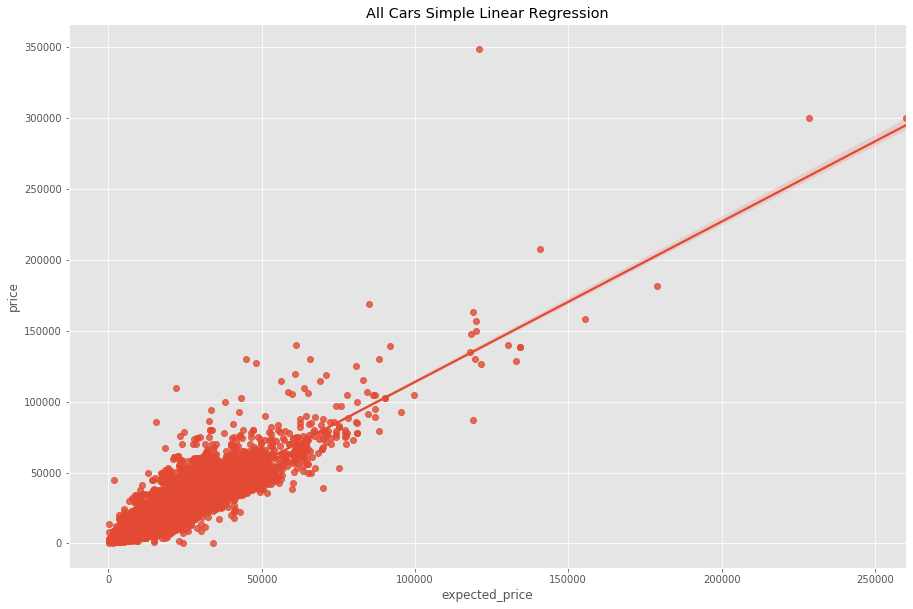

In [11]:
# multiple linear regression
# set missing option to drop any missing data
print('Multiple linear regression for all variables across all cars')
df_all_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_doors + n_pics + views + favorites + view_rate + favorite_rate + fav_per_view", data=cars, missing='drop').fit()
display(df_all_ols.summary())

# remove correlated variables
# correlated variables - views x favorites, views x view_rate, favorites x favorite_rate, views x favorite_rate, view_rate x favorite_rate
print('Multiple linear regression with highly correlated variables removed (favorites and views and their rates)')
df_all_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_doors + n_pics + favorites + fav_per_view", data=cars, missing='drop').fit()
display(df_all_ols.summary())

# remove insignificant variables
print('Multiple linear regression with significant predictor variables')
df_all_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + fav_per_view", data=cars, missing='drop').fit()
display(df_all_ols.summary())

# remove insignificant variables
print('Multiple linear regression with significant predictor variables round 2')
df_all_ols = sm.ols(formula="price ~ year + mileage + liters + fav_per_view", data=cars, missing='drop').fit()
display(df_all_ols.summary())

# Compare expected price from cargurus to actual list price
print('Simple linear regression of expected price')
df_ols = sm.ols(formula="price ~ expected_price", data=cars, missing='drop').fit()
display(df_ols.summary())

plt.figure(figsize=(15,10))
sns.regplot(x='expected_price', y='price', data=cars)
plt.title('All Cars Simple Linear Regression')
plt.show()

In [12]:
# Find the most common car make
cars["make_model"] = cars["make"] + ' ' + cars["model"]

print('Most common models of cars:')
print(cars['make_model'].value_counts()[:5].sort_values(ascending=False))
# the 1500 model includes Ram, GMC so second most common car is Silverado 1500

# Find all Ford F150, most popular car
mask = cars['make_model'] == 'Ford F-150'
F150 = cars[mask]

Most common models of cars:
Ford F-150                  2818
Chevrolet Silverado 1500    1064
Ram 1500                    1013
Ford F-350                   934
Jeep Wrangler                850
Name: make_model, dtype: int64


,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view,title_num,seller_num,transmission_num,drive_num
lastpull_ts,1.000000,-0.116439,-0.124585,0.134419,0.245148,0.029026,-0.060599,-0.093360,-0.118056,2.500597e-02,-0.084633,-0.071930,1.309885e-01,0.108652,0.109693,0.004784,-0.062820,0.147195,0.064609,-0.052036
price,-0.116439,1.000000,0.739943,-0.782723,-0.434708,-0.406019,0.384695,0.315013,0.835208,-4.013785e-02,-0.079888,-0.150768,9.627255e-02,-0.105577,-0.160874,-0.105849,0.085952,-0.372298,-0.229829,0.195712
year,-0.124585,0.739943,1.000000,-0.669551,-0.491873,-0.378078,0.552920,0.307409,0.943175,-1.334017e-02,-0.193483,-0.240400,9.731050e-02,-0.199496,-0.215371,-0.087167,-0.014423,-0.491828,-0.422636,0.260495
mileage,0.134419,-0.782723,-0.669551,1.000000,0.441436,0.320663,-0.258661,-0.274326,-0.930681,-2.866341e-02,0.000742,0.072081,-5.856429e-02,0.036363,0.095576,0.113588,0.037556,0.389535,0.157771,-0.192236
liters,0.245148,-0.434708,-0.491873,0.441436,1.000000,0.881116,-0.156831,-0.135915,-0.472109,2.326935e-02,0.168128,0.162428,-1.960788e-02,0.223158,0.210111,0.102372,0.032228,0.409098,0.169964,-0.185561
cylinders,0.029026,-0.406019,-0.378078,0.320663,0.881116,1.000000,-0.117380,-0.144906,-0.330255,-9.541802e-04,0.082121,0.091158,-1.675466e-02,0.085945,0.077306,0.024396,-0.004854,0.173915,0.025658,0.004037
n_doors,-0.060599,0.384695,0.552920,-0.258661,-0.156831,-0.117380,1.000000,0.208616,0.180767,8.865903e-03,-0.172219,-0.134523,7.548240e-02,-0.185922,-0.126945,0.035637,-0.027710,-0.233111,-0.426685,0.260355
n_pics,-0.093360,0.315013,0.307409,-0.274326,-0.135915,-0.144906,0.208616,1.000000,0.235516,-3.615114e-03,0.072622,0.068367,7.428254e-02,0.039889,0.028024,0.076176,0.038336,-0.311599,-0.132834,0.104791
expected_price,-0.118056,0.835208,0.943175,-0.930681,-0.472109,-0.330255,0.180767,0.235516,1.000000,2.879648e-02,-0.011438,-0.127836,4.852478e-02,-0.046705,-0.134434,-0.168520,-0.002949,-0.312247,-0.089223,0.106319
zip_code,0.025006,-0.040138,-0.013340,-0.028663,0.023269,-0.000954,0.008866,-0.003615,0.028796,1.000000e+00,0.018876,-0.008689,3.744272e-07,0.017447,-0.008910,-0.005409,-0.142457,0.012621,-0.005776,-0.020924


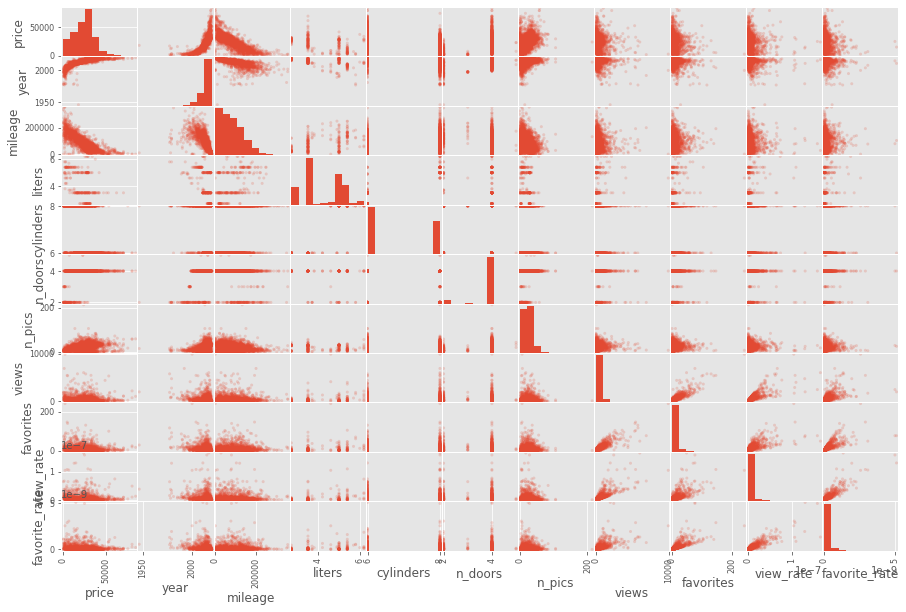

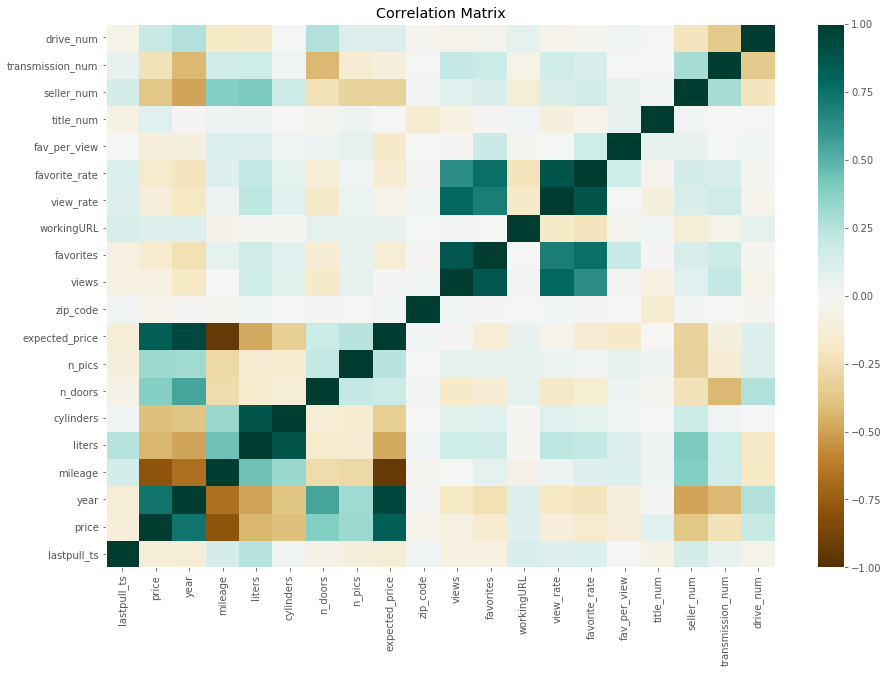

In [13]:
# Ford F150
# Scatter Matrix
scatter_matrix(F150[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics",'views','favorites','view_rate','favorite_rate']], alpha = 0.2, figsize=(15, 10))
print()

# Correlation Matrix
# automatically ignores missing values
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot(111)
plt.pcolor(F150.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics','expected_price','zip_code','views','favorites','workingURL','view_rate','favorite_rate','fav_per_view','title_num', 'seller_num', 'transmission_num', 'drive_num'] # check labels for final df
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=90)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
display(F150.corr())

In [14]:
# Ford F150 Multiple Linear Regression
print('Multiple linear regression Ford F150')
df_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_doors + n_pics + views + favorites + title_num + seller_num + transmission_num + drive_num", data=F150, missing='drop').fit()
display(df_ols.summary())
print('We explained 85% of the variance with this initial model including all variables \n \n')

print('Multiple linear regression Ford F150 remove insignificant variables')
df_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_pics + views + favorites + drive_num", data=F150, missing='drop').fit()
display(df_ols.summary())
print('We explained 76% of the variance with our second model that doesn not include variables that were not signficiant in the previous model \n \n')

print('Simple linear regression of expected price Ford F150')
df_ols = sm.ols(formula="price ~ expected_price", data=F150, missing='drop').fit()
display(df_ols.summary())
print('70% of the variance is explained when comparing the expected price to the list price. The model we developed above is explains more variance than the CarGurus expected price. \n \n')



Multiple linear regression Ford F150


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     31.38
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.23e-22
Time:                        15:30:23   Log-Likelihood:                -780.53
No. Observations:                  79   AIC:                             1587.
Df Residuals:                      66   BIC:                             1618.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.638e+06   3.73e+05     -4.392      0.000   -2.38e+06   -8.93e+05
year               829.3435    185.929      4.461      0.000     458.125    1200.562
mileage             -0.1036      0.014     -7.617      0.000      -0.131      -0.076
liters            3937.1319   1689.672      2.330      0.023     563.593    7310.671
cylinders        -3820.4984   1657.460     -2.305      0.024   -7129.723    -511.274
n_doors           -711.4071   1398.275     -0.509      0.613   -3503.153    2080.339
n_pics             214.8670     69.571      3.088      0.003      75.964     353.770
views                2.9815      1.353      2.204      0.031       0.281       5.682
favorites         -210.1198     57.720     -3.640      0.001    -325.361     -94.879
title_num         2833.1703   4401.013      0.644      0.522   -5953.735    1.16e+04
seller_num        1310.0135   2012.622      0.651      0.517   -2708.316    5328.343
transmission_num  9084.3464   3645.031      2.492      0.015    1806.807    1.64e+04
drive_num         7694.7002   3802.645      2.024      0.047     102.474    1.53e+04
==============================================================================
Omnibus:                       48.849   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.800
Skew:                           1.620   Prob(JB):                     1.21e-73
Kurtosis:                      12.566   Cond. No.                     8.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We explained 85% of the variance with this initial model including all variables 
 

Multiple linear regression Ford F150 remove insignificant variables


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     80.29
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           7.79e-59
Time:                        15:30:23   Log-Likelihood:                -2132.4
No. Observations:                 213   AIC:                             4283.
Df Residuals:                     204   BIC:                             4313.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.134e+06   2.05e+05     -5.523      0.000   -1.54e+06   -7.29e+05
year         582.1954    102.222      5.695      0.000     380.649     783.742
mileage       -0.0984      0.009    -10.544      0.000      -0.117      -0.080
liters      5189.7993   1015.670      5.110      0.000    3187.242    7192.357
cylinders  -5462.6438    974.553     -5.605      0.000   -7384.131   -3541.157
n_pics        73.8617     35.052      2.107      0.036       4.751     142.973
views          2.6921      1.139      2.363      0.019       0.446       4.938
favorites   -161.4355     46.791     -3.450      0.001    -253.691     -69.180
drive_num   8130.1840   2935.589      2.770      0.006    2342.199    1.39e+04
==============================================================================
Omnibus:                      105.773   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.696
Skew:                           1.750   Prob(JB):                    4.98e-175
Kurtosis:                      11.843   Cond. No.                     5.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We explained 76% of the variance with our second model that doesn not include variables that were not signficiant in the previous model 
 

Simple linear regression of expected price Ford F150


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6013.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:30:23   Log-Likelihood:                -26466.
No. Observations:                2609   AIC:                         5.294e+04
Df Residuals:                    2607   BIC:                         5.295e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -718.0173    365.914     -1.962      0.050   -1435.528      -0.506
expected_price     1.2257      0.016     77.545      0.000       1.195       1.257
==============================================================================
Omnibus:                      829.008   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4104.675
Skew:                           1.434   Prob(JB):                         0.00
Kurtosis:                       8.435   Cond. No.                     7.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

70% of the variance is explained when comparing the expected price to the list price. The model we developed above is explains more variance than the CarGurus expected price. 
 




Correlations for the Chevy Silverado 1500


,lastpull_ts,price,year,mileage,liters,cylinders,n_doors,n_pics,expected_price,zip_code,views,favorites,workingURL,view_rate,favorite_rate,fav_per_view,title_num,seller_num,transmission_num,drive_num
lastpull_ts,1.000000,-0.091915,-0.070822,0.073522,-0.145623,-0.074656,-0.034022,-0.072455,-0.056949,-0.003494,-0.075957,-0.037439,0.129403,0.148363,0.185172,0.087709,-0.034162,0.096835,-0.031613,0.009010
price,-0.091915,1.000000,0.861522,-0.843818,0.129726,0.119696,0.338540,0.321471,0.881260,-0.077925,-0.253601,-0.301852,0.167657,-0.252348,-0.301003,-0.166110,0.077677,-0.387560,-0.091116,0.170793
year,-0.070822,0.861522,1.000000,-0.815536,-0.089529,0.011394,0.348892,0.327722,0.946857,0.045386,-0.196378,-0.274748,0.163871,-0.202702,-0.276816,-0.167704,-0.082858,-0.453486,-0.086690,0.227082
mileage,0.073522,-0.843818,-0.815536,1.000000,-0.020453,-0.020309,-0.264195,-0.303844,-0.916268,-0.057350,0.161501,0.213216,-0.112795,0.163984,0.213534,0.121370,0.130545,0.362302,0.072323,-0.132712
liters,-0.145623,0.129726,-0.089529,-0.020453,1.000000,0.764087,0.474024,-0.019107,0.108078,-0.066192,-0.175669,-0.116677,-0.083568,-0.062468,-0.046426,-0.030442,-0.221152,0.185393,-0.326610,NaN
cylinders,-0.074656,0.119696,0.011394,-0.020309,0.764087,1.000000,0.341398,0.083080,0.010761,-0.090242,-0.115577,-0.049433,-0.040489,-0.103206,-0.045435,0.062880,0.043487,-0.047621,-0.176414,0.240951
n_doors,-0.034022,0.338540,0.348892,-0.264195,0.474024,0.341398,1.000000,0.128551,0.213347,0.015006,-0.123592,-0.051795,0.081864,-0.135959,-0.067193,0.039859,-0.071529,-0.149830,-0.211701,0.336133
n_pics,-0.072455,0.321471,0.327722,-0.303844,-0.019107,0.083080,0.128551,1.000000,0.244638,0.019367,0.070654,0.064945,0.115104,0.034281,0.030737,-0.017435,0.036261,-0.277658,-0.046749,0.088499
expected_price,-0.056949,0.881260,0.946857,-0.916268,0.108078,0.010761,0.213347,0.244638,1.000000,0.067804,-0.184911,-0.277597,0.117384,-0.194938,-0.275081,-0.216032,-0.077150,-0.291877,-0.090757,0.112793
zip_code,-0.003494,-0.077925,0.045386,-0.057350,-0.066192,-0.090242,0.015006,0.019367,0.067804,1.000000,0.054464,-0.011870,-0.053541,0.061539,0.004986,-0.061668,-0.401387,-0.029862,-0.008003,-0.000067


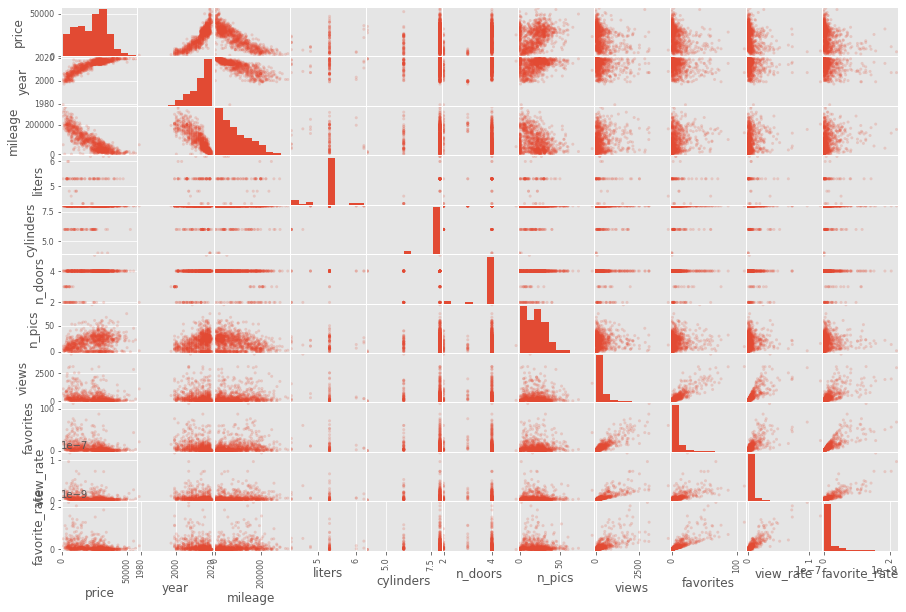

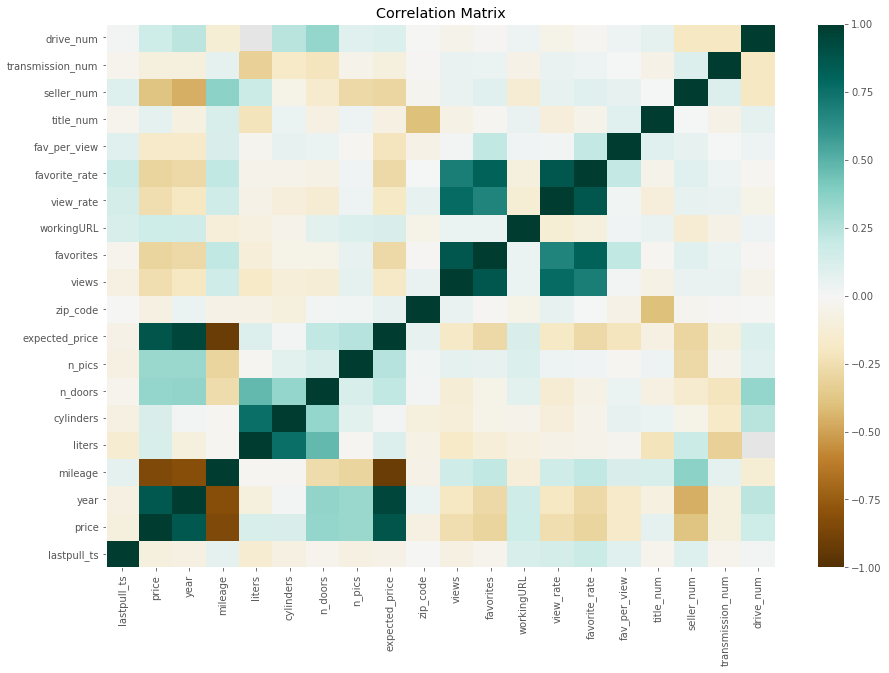

In [15]:
# Second most commont type of car

# Find all Chevy Silverado 1500, second most popular car
mask = cars['make_model'] == 'Chevrolet Silverado 1500'
silverado_1500 = cars[mask]

# Chevy Silverado 1500
# Scatter Matrix
scatter_matrix(silverado_1500[["price", "year", "mileage", "liters", "cylinders", "n_doors", "n_pics",'views','favorites','view_rate','favorite_rate']], alpha = 0.2, figsize=(15, 10))
print()

# Correlation Matrix
# automatically ignores missing values
fig = plt.figure(figsize=(15,10));
ax = fig.add_subplot(111)
plt.pcolor(silverado_1500.corr(),vmin=-1,vmax=1, cmap=plt.cm.get_cmap('BrBG'))
labels = ['lastpull_ts','price','year','mileage','liters','cylinders','n_doors','n_pics','expected_price','zip_code','views','favorites','workingURL','view_rate','favorite_rate','fav_per_view','title_num', 'seller_num', 'transmission_num', 'drive_num'] # check labels for final df
plt.xticks([i+0.5 for i in range(len(labels))],labels=labels,rotation=90)
plt.yticks([i+0.5 for i in range(len(labels))],labels=labels)
plt.title("Correlation Matrix");
plt.colorbar();
print('Correlations for the Chevy Silverado 1500')
display(silverado_1500.corr())

In [16]:
# Silverado 1500 Multiple Linear Regression
print('Multiple linear regression Chevy Silverado 1500')
df_ols = sm.ols(formula="price ~ year + mileage + liters + cylinders + n_doors + n_pics + views + favorites + title_num + seller_num + transmission_num + drive_num", data=silverado_1500, missing='drop').fit()
display(df_ols.summary())
print(' We explained 94% of the variance when including all variables in this model to predict the list price of Chevy Silverado 1500. \n \n')

print('Multiple linear regression Chevy Silverado 1500 remove insignificant variables')
df_ols = sm.ols(formula="price ~ year + mileage + liters + drive_num", data=silverado_1500, missing='drop').fit()
display(df_ols.summary())
print(' Our model explains 89% of the variance after removing the unsiginificant variables. \n \n')

print('Simple linear regression of expected price Chevy Silverado 1500')
df_ols = sm.ols(formula="price ~ expected_price", data=silverado_1500, missing='drop').fit()
display(df_ols.summary())
print('77% of the variance is explained when comparing the expected price to the list price. The model we developed above is explains more variance than the CarGurus expected price. \n \n')



Multiple linear regression Chevy Silverado 1500


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     22.74
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           2.29e-07
Time:                        15:30:39   Log-Likelihood:                -244.81
No. Observations:                  27   AIC:                             513.6
Df Residuals:                      15   BIC:                             529.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7.581e+05   2.04e+05     -3.715      0.002   -1.19e+06   -3.23e+05
year               761.1813    203.558      3.739      0.002     327.308    1195.055
mileage             -0.0727      0.016     -4.529      0.000      -0.107      -0.038
liters            5910.0804   2345.930      2.519      0.024     909.849    1.09e+04
cylinders        -2413.1375   1952.357     -1.236      0.235   -6574.488    1748.213
n_doors          -2002.4707   2458.215     -0.815      0.428   -7242.032    3237.090
n_pics              77.0456     66.165      1.164      0.262     -63.982     218.074
views                0.3879      3.055      0.127      0.901      -6.124       6.900
favorites          -43.2033     91.872     -0.470      0.645    -239.023     152.616
title_num         4112.2080   2503.119      1.643      0.121   -1223.065    9447.481
seller_num        3161.1108   2314.343      1.366      0.192   -1771.795    8094.017
transmission_num -6389.1302   7086.182     -0.902      0.382   -2.15e+04    8714.710
drive_num        -7.581e+05   2.04e+05     -3.715      0.002   -1.19e+06   -3.23e+05
==============================================================================
Omnibus:                        3.131   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                1.856
Skew:                          -0.119   Prob(JB):                        0.395
Kurtosis:                       4.262   Cond. No.                     7.50e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.25e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

 We explained 94% of the variance when including all variables in this model to predict the list price of Chevy Silverado 1500. 
 

Multiple linear regression Chevy Silverado 1500 remove insignificant variables


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     198.3
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.02e-34
Time:                        15:30:39   Log-Likelihood:                -738.07
No. Observations:                  76   AIC:                             1484.
Df Residuals:                      72   BIC:                             1493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.968e+05   1.56e+05     -5.103      0.000   -1.11e+06   -4.86e+05
year         792.6384    153.959      5.148      0.000     485.726    1099.551
mileage       -0.0965      0.012     -8.073      0.000      -0.120      -0.073
liters      5414.3593   1324.393      4.088      0.000    2774.229    8054.489
drive_num  -7.968e+05   1.56e+05     -5.103      0.000   -1.11e+06   -4.86e+05
==============================================================================
Omnibus:                        6.648   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.358
Skew:                           0.706   Prob(JB):                       0.0416
Kurtosis:                       3.129   Cond. No.                     4.71e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.18e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

 Our model explains 89% of the variance after removing the unsiginificant variables. 
 

Simple linear regression of expected price Chevy Silverado 1500


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     3320.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):          4.33e-313
Time:                        15:30:39   Log-Likelihood:                -9494.4
No. Observations:                 957   AIC:                         1.899e+04
Df Residuals:                     955   BIC:                         1.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1463.0446    432.702      3.381      0.001     613.889    2312.201
expected_price     1.0775      0.019     57.621      0.000       1.041       1.114
==============================================================================
Omnibus:                       56.231   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.250
Skew:                          -0.312   Prob(JB):                     9.54e-31
Kurtosis:                       4.754   Cond. No.                     6.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

77% of the variance is explained when comparing the expected price to the list price. The model we developed above is explains more variance than the CarGurus expected price. 
 



#### Regression Interpretation
For the most popular car, the Ford F-150, we were able to make a multiple linear regression model that explained 76% of the variance in list price using the independent variables of year, mileage, liters, cylinders, n_pics, views, favorites, and drive (4-wheel drive vs 2-wheel drive). This explained more of the variance than just comparing the list price to the car gurus expected price.

For the second most popular car, the Chevy Silverado 1500, our multiple linear regression model explained 89% of the variance in list price using the variables year, mileage, liters, and drive. It is interesting that this model explained more of the variance with less variables. When we included all of the variables we were able to explain 94% of the variance, but this model is probably overfit. 

These regression models for individual cars explain a lot of the variance in this dataset and could be used to predict the expected price of cars on ksl based on their year, mileage, liters, cylinders, and drive. These expected list prices could be compared to the list price to alert potential buyers to good/bad deals instead of using a website like CarGurus.

#### Clustering
We plan to cluster what we classify as a “good deal” in its respective geographical location and create clusters showing areas in Utah where cars are generally sold for a good deal. We're going to create a heat map that displays the average percent difference between the cargurus expected price and the list price to find geographical locations of good deals.

In [17]:
# Clustering test
print(cars["make_model"].value_counts()[:5].sort_values(ascending=False))

# g = sns.clustermap(iris, method="average", metric="euclidean", row_colors=row_colors, cmap="Blues")

Ford F-150                  2818
Chevrolet Silverado 1500    1064
Ram 1500                    1013
Ford F-350                   934
Jeep Wrangler                850
Name: make_model, dtype: int64


In [18]:
import json, pickle

from ipyleaflet import Map, basemaps, GeoJSON, Popup, FullScreenControl, CircleMarker, LayerGroup
# if above module isn't installed, do BOTH of the following:
# pip install ipyleaflet
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipywidgets import HTML # pip install ipywidgets
from uszipcode import SearchEngine # pip install uszipcode

search = SearchEngine()

In [19]:
# Add in a city, state column
cars['citystate_abb'] = cars[['city', 'state']].apply(lambda x: ', '.join(x.astype(str)), axis=1)
# Combine make and model for new column
cars['make_model'] = cars[['make', 'model']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# only get non-null expected price rows
good_cars = cars[cars.expected_price.notnull()]

In [20]:
# load zip code coordinates
with open(os.path.join(os.getcwd(),'maps','zip_coord_api.pkl'),'rb') as handle:
    zip_coord = pickle.load(handle)

In [21]:
# reverse the ZIP:lat/long dictionary
coor_zip = {str(round(v[0], 3))+str(round(v[1], 3)): k for k, v in zip_coord.items()}

if len(coor_zip) != len(zip_coord):
    raise ValueError('the reversed ZIP code dictionary had a different number of keys than the original')

In [22]:
# group the data by ZIP code and generate some summary statistics for the map
good_cars = good_cars.copy()
good_cars['price_diff'] =  good_cars['price'] / good_cars['expected_price']
good_cars['price_cat'] = pd.qcut(good_cars['price_diff'], 3, labels=["green", "orange", "red"])
good_cars['price_abs_cat'] = pd.qcut(good_cars['price'], 3, labels=["green", "orange", "red"])
good_cars['price_label'] = pd.qcut(good_cars['price_diff'], 3, labels=["Good", "Average", "Bad"])
good_cars['price_abs_label'] = pd.qcut(good_cars['price'], 3, labels=["Cheap", "Average", "Expensive"])

good_cars['zip_code'] = good_cars['zip_code'].astype(int)
zip_group = good_cars.groupby('zip_code')

zip_group_mode = zip_group.agg(pd.Series.mode)
zip_group_median = zip_group.agg(pd.Series.median)
zip_group_count = zip_group.agg('count').iloc[:,0]
zip_group_count_log = np.floor(np.log(zip_group_count)+2)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


##### Generate an interactive map that categorizes how good city prices are based on $\frac{KSL\,listed\,price}{CarGurus\,expected\,price}$

* Color encodes whether cars in that area are generally a good deal
    * Red = bad
    * Orange = average
    * Green = good
* Circle size encodes how many cars are listed for a given location
* Click on each colored circle to display summary statistics for a given city

In [23]:
# Generate an interactive map that categorizes how good city prices are based on the ratio of KSL listed price over CarGurus expected price

utah_center = [39.3210, -111.0937]
zoom = 6
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=utah_center, zoom=zoom)
m.add_control(FullScreenControl())

def click_disp(event, type, coordinates):
    # use coordinates to reverse look up data associated with those coordinates
    try:
        currzip = coor_zip[str(round(coordinates[0], 3))+str(round(coordinates[1], 3))]
    except:
        currzip = int(search.by_coordinates(40.4, -112, radius=30, returns=1)[0].zipcode)
    currdata = good_cars.loc[good_cars['zip_code'] == currzip]
    currlabel = zip_group_mode.loc[currzip, 'citystate_abb']
    currtotal = "{:,}".format(zip_group_count.loc[currzip])
    currmedprice = "{:,}".format(int(zip_group_median.loc[currzip, 'price']))
    currmedmile = "{:,}".format(int(zip_group_median.loc[currzip, 'mileage']))
    currmedyear = str(int(zip_group_median.loc[currzip, 'year']))
    if isinstance(zip_group_mode.loc[currzip, 'make_model'], str):
        currcommcar = zip_group_mode.loc[currzip, 'make_model']
        mid_msg = '<tr><td>Most Common Car:&emsp;</td><td>' + currcommcar + '</td></tr>'
    else:
        currcommcar = zip_group_mode.loc[currzip, 'make_model'][0]
        mid_msg = '<tr><td>Most Common Car:&emsp;</td><td>' + currcommcar + '</td></tr>'
        for currcommcar in zip_group_mode.loc[currzip, 'make_model'][1:]:
            mid_msg += '<tr><td>&emsp;</td><td>' + currcommcar + '</td></tr>'
    if isinstance(zip_group_mode.loc[currzip, 'price_label'], str):
        currdeal = zip_group_mode.loc[currzip, 'price_label']
    else:
        currdeal = zip_group_mode.loc[currzip, 'price_label'][0]
    
    # remove old popup layer
    if isinstance(m.layers[-1], Popup):
        m.remove_layer(m.layers[-1])

    # add a popup layer on hover over a city
    message = HTML()
    
    upper_msg = ('<h4><strong>' + currlabel + '</strong></h4>' +
                     '<table>' +
                         '<tr><td>Total Cars:&emsp;</td><td>' + currtotal + '</td></tr>' +
                         '<tr><td>Median Price:&emsp;</td><td>$' + currmedprice + '</td></tr>' +
                         '<tr><td>Median Mileage:&emsp;</td><td>' + currmedmile + '</td></tr>' +
                         '<tr><td>Median Year:&emsp;</td><td>' + currmedyear + '</td></tr>')
    lower_msg = ('<tr><td>Overall Market:&emsp;</td><td>' + currdeal + '</td></tr>' +
                     '</table>')

    message.value = upper_msg + mid_msg + lower_msg
    
    popup = Popup(location=coordinates, child=message, close_button=False, auto_close=True, close_on_escape_key=False)

    m.add_layer(popup) # add the new layer

# create a layer group 
layer_group = LayerGroup()
for zipp, coord in zip_coord.items():
    circle = CircleMarker()
    circle.location = coord
    circle.radius = int(zip_group_count_log[zipp])
    circle.weight = 2
    circle.opacity = 0.8
    if isinstance(zip_group_mode.loc[zipp,'price_cat'], str):
        color = zip_group_mode.loc[zipp,'price_cat']
    else:
        color = zip_group_mode.loc[zipp,'price_cat'][0]
    circle.color = color
    circle.fill_color = color
    circle.fill_opacity = 0.3
    layer_group.add_layer(circle)
    circle.on_click(click_disp)

    

m.add_layer(layer_group)
m

Map(center=[39.321, -111.0937], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

##### Generate a different interactive map that categorizes how good city prices are based on all KSL listed prices

* Color encodes how cars in that area generally compare to others on KSL
    * Red = expensive
    * Orange = average
    * Green = cheap
* Circle size encodes how many cars are listed for a given location
* Click on each colored circle to display summary statistics for a given city

In [24]:
# Generate a different interactive map that categorizes how good city prices are based on all KSL listed prices

utah_center = [39.3210, -111.0937]
zoom = 6
m2 = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=utah_center, zoom=zoom)
m2.add_control(FullScreenControl())

def click_disp(event, type, coordinates):
    # use coordinates to reverse look up data associated with those coordinates
    try:
        currzip = coor_zip[str(round(coordinates[0], 3))+str(round(coordinates[1], 3))]
    except:
        currzip = int(search.by_coordinates(40.4, -112, radius=30, returns=1)[0].zipcode)
    currdata = good_cars.loc[good_cars['zip_code'] == currzip]
    currlabel = zip_group_mode.loc[currzip, 'citystate_abb']
    currtotal = "{:,}".format(zip_group_count.loc[currzip])
    currmedprice = "{:,}".format(int(zip_group_median.loc[currzip, 'price']))
    currmedmile = "{:,}".format(int(zip_group_median.loc[currzip, 'mileage']))
    currmedyear = str(int(zip_group_median.loc[currzip, 'year']))
    if isinstance(zip_group_mode.loc[currzip, 'make_model'], str):
        currcommcar = zip_group_mode.loc[currzip, 'make_model']
        mid_msg = '<tr><td>Most Common Car:&emsp;</td><td>' + currcommcar + '</td></tr>'
    else:
        currcommcar = zip_group_mode.loc[currzip, 'make_model'][0]
        mid_msg = '<tr><td>Most Common Car:&emsp;</td><td>' + currcommcar + '</td></tr>'
        for currcommcar in zip_group_mode.loc[currzip, 'make_model'][1:]:
            mid_msg += '<tr><td>&emsp;</td><td>' + currcommcar + '</td></tr>'
    if isinstance(zip_group_mode.loc[currzip, 'price_abs_label'], str):
        currdeal = zip_group_mode.loc[currzip, 'price_abs_label']
    else:
        currdeal = zip_group_mode.loc[currzip, 'price_abs_label'][0]
        
    # remove old popup layer
    if isinstance(m2.layers[-1], Popup):
        m2.remove_layer(m2.layers[-1])

    # add a popup layer on hover over a city
    message = HTML()
    
    upper_msg = ('<h4><strong>' + currlabel + '</strong></h4>' +
                     '<table>' +
                         '<tr><td>Total Cars:&emsp;</td><td>' + currtotal + '</td></tr>' +
                         '<tr><td>Median Price:&emsp;</td><td>$' + currmedprice + '</td></tr>' +
                         '<tr><td>Median Mileage:&emsp;</td><td>' + currmedmile + '</td></tr>' +
                         '<tr><td>Median Year:&emsp;</td><td>' + currmedyear + '</td></tr>')
    lower_msg = ('<tr><td>Overall Market:&emsp;</td><td>' + currdeal + '</td></tr>' +
                     '</table>')

    message.value = upper_msg + mid_msg + lower_msg
    
    popup = Popup(location=coordinates, child=message, close_button=False, auto_close=True, close_on_escape_key=False)

    m2.add_layer(popup) # add the new layer

# create a layer group 
layer_group = LayerGroup()
for zipp, coord in zip_coord.items():
    circle = CircleMarker()
    circle.location = coord
    circle.radius = int(zip_group_count_log[zipp])
    circle.weight = 2
    circle.opacity = 0.8
    if isinstance(zip_group_mode.loc[zipp,'price_abs_cat'], str):
        color = zip_group_mode.loc[zipp,'price_abs_cat']
    else:
        color = zip_group_mode.loc[zipp,'price_abs_cat'][0]
    circle.color = color
    circle.fill_color = color
    circle.fill_opacity = 0.3
    layer_group.add_layer(circle)
    circle.on_click(click_disp)

    

m2.add_layer(layer_group)
m2

Map(center=[39.321, -111.0937], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

### Project Schedule

#### February 24th - 28th
* Check data accessibility (robots.txt and terms of conditions) 
* Basic info due Wed Feb 26th
* Project Proposal due Fri Feb 28th
#### March 2nd - 6th
* Download html files for all recent listings from ksl
* Begin data scraping and create one dataframe with each row as a listing
* Get/give peer feedback March 5th
* Written feedback from staff by March 8th
#### March 9th - 13th (Spring Break)
* Finish data scraping 
* Exploratory analysis
* Describe 

#### March 16th - 20th
* Exploratory analysis
    * Scatter Matrix
        * Interpret histograms - check if there are any outliers that could be an error from scraping
        * Interpret correlations
    * Heatmap of Correlation Matrix
        * Interpret Correlations

#### March 23rd - 27th
* Write up project milestone
* Project milestone due March 29th 
* Acquired, cleaned data, EDA, Sketches of your analysis methods, Submit zip file with Jupyter Notebook, data, other resources.

#### March 30th - April 3rd 
* Get staff feedback
* Begin testbed for good deal predictions based on relation to scraped historical dataset

#### April 6th - April 10th
* Finalize predictive model for new listings
* Script and film project video

#### April 13th - 17th
* Polish up repository in preparation for final submission
* Edit and finalize project video
* Project Due Sunday April 19th
* Project awards April 21st



### Peer Feedback
Our Reviewers: Kyle Cornwall, Shushanna Mkrtychyan

* This is pretty similar to cargurus.com and KBB. How is this different than those existing sites?

* How do you know if a car has been in an accident?

* Look for granularity of NADAguides and devise ways that we can "beat" that model.

* Consider doing feature transformation when doing regression.

* Can you enhance the dataset with some other website?

* What features do other car valuation websites use to generate their price predictions?

* Can you get Carfax info from VIN? (without breaking the bank)

* Three potential classes when predicting a value (good, average, bad)

* Might need to downselect the number of cars we can predict prices for since our dataset size could be limited (i.e. top 20 most frequent cars)

### Video

Add link to final video